In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('beats_reviews_full.csv')
df_comp = pd.read_csv('beats_competitors.csv')

**Word Cloud**

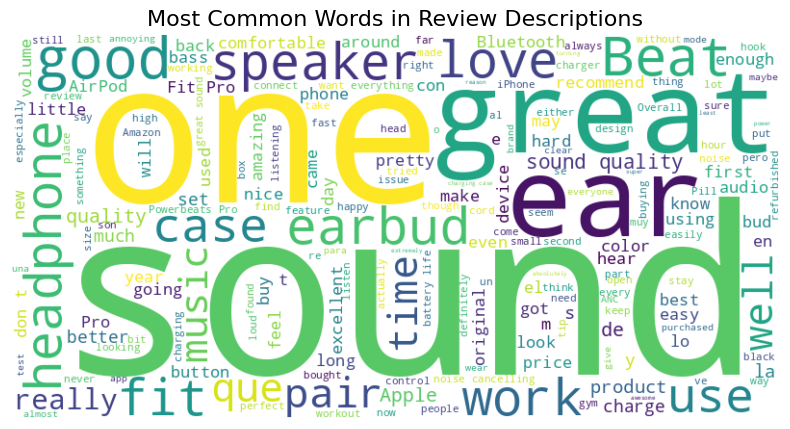

In [4]:
from wordcloud import WordCloud

#combine all review content
text = " ".join(review for review in df['content'] )

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

#display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Review Descriptions", fontsize=16)
plt.show()



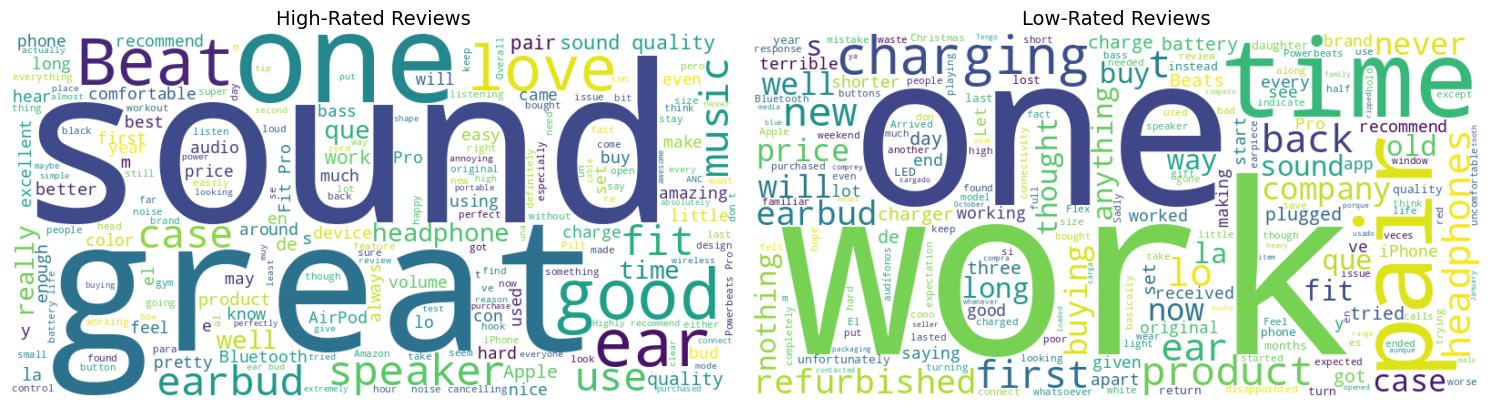

In [5]:
#Separate high and low rated
high_rated = " ".join(review for review in df[df['rating'] >= 4]['content'].dropna())
low_rated = " ".join(review for review in df[df['rating'] <= 2]['content'].dropna())

# Generate high-rated wordcloud
high_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(high_rated)

# Generate low-rated wordcloud
low_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(low_rated)

# Display the wordclouds side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].imshow(high_wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title("High-Rated Reviews", fontsize=14)

axs[1].imshow(low_wordcloud, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title("Low-Rated Reviews", fontsize=14)

plt.tight_layout()
plt.show()

**Frequency Charts**

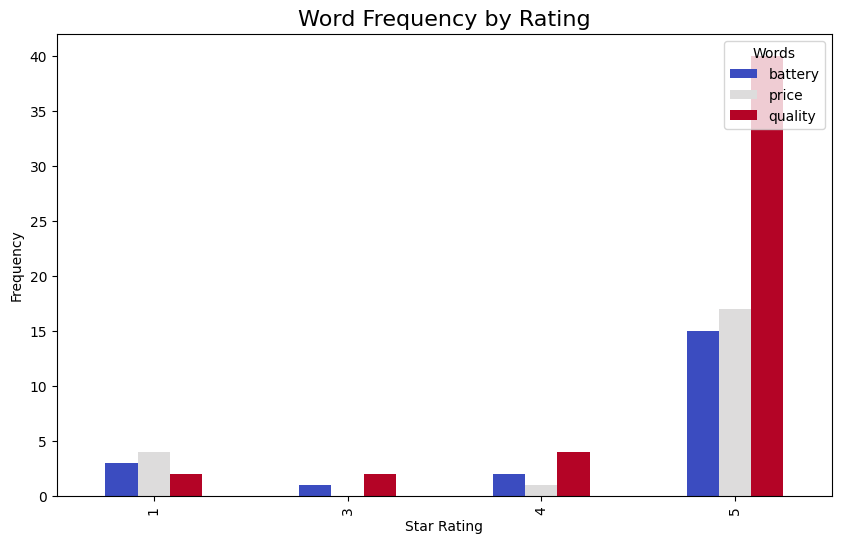

In [6]:
words_to_compare = ['battery', 'price', 'quality']

# Count occurrences of each word by rating
word_freq_by_rating = {word: df[df['content'].str.contains(word, case=False, na=False)]['rating'].value_counts() for word in words_to_compare}

# Plot graph
freq_df = pd.DataFrame(word_freq_by_rating).fillna(0)
freq_df.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title("Word Frequency by Rating", fontsize=16)
plt.xlabel("Star Rating")
plt.ylabel("Frequency")
plt.legend(title="Words", loc='upper right')
plt.show()

<ipython-input-7-a4140f8b7115>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product', y='rating', data=avg_rating, palette='muted')


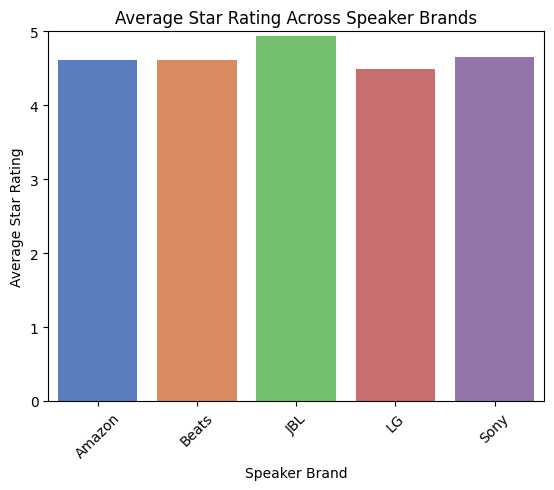

In [7]:
# compare average ratings
import seaborn as sns
import matplotlib.pyplot as plt

# average star rating for each product
avg_rating = df_comp.groupby('product')['rating'].mean().reset_index()

# plot the average ratings
sns.barplot(x='product', y='rating', data=avg_rating, palette='muted')
plt.title("Average Star Rating Across Speaker Brands")
plt.xlabel("Speaker Brand")
plt.ylabel("Average Star Rating")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.show()

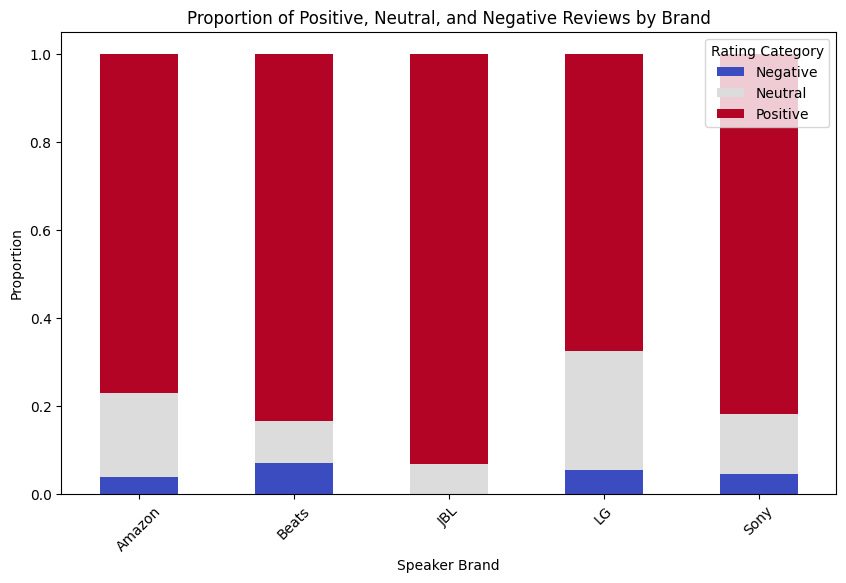

In [8]:
# compare review ratings
def categorize_rating(rating):
    if rating == 5:
        return 'Positive'
    elif rating >= 3:
        return 'Neutral'
    else:
        return 'Negative'

# Add a new column for rating categories
df_comp['rating category'] = df_comp['rating'].apply(categorize_rating)

# Calculate proportions by product
rating_proportions = df_comp.groupby(['product', 'rating category']).size().unstack(fill_value=0)
rating_proportions = rating_proportions.div(rating_proportions.sum(axis=1), axis=0)

# Plot the proportions
rating_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Proportion of Positive, Neutral, and Negative Reviews by Brand")
plt.xlabel("Speaker Brand")
plt.ylabel("Proportion")
plt.legend(title="Rating Category", loc="upper right")
plt.xticks(rotation=45)
plt.show()


<ipython-input-9-079038d27bc4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product', y='rating', data=df_comp, palette='Set3')


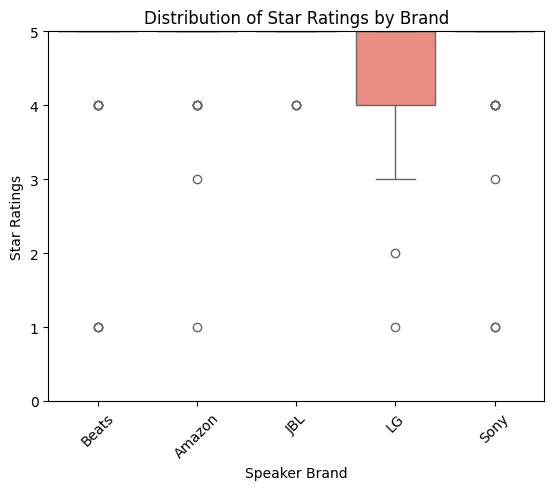

In [9]:
# box plot
sns.boxplot(x='product', y='rating', data=df_comp, palette='Set3')
plt.title("Distribution of Star Ratings by Brand")
plt.xlabel("Speaker Brand")
plt.ylabel("Star Ratings")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.show()


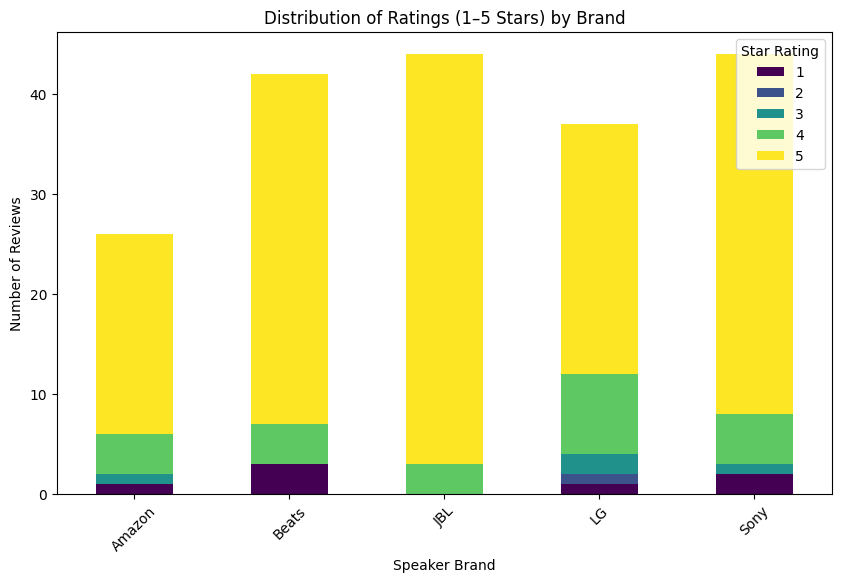

In [10]:
# Count the number of each star rating per product
rating_counts = df_comp.groupby(['product', 'rating']).size().unstack(fill_value=0)

# Plot the stacked bar chart
rating_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Distribution of Ratings (1–5 Stars) by Brand")
plt.xlabel("Speaker Brand")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Star Rating", loc="upper right")
plt.show()


In [11]:
# extract year
df_comp['timestamp'] = df_comp['timestamp'].astype(str)
df_comp['year'] = df_comp['timestamp'].str.extract(r'(\d{4})$')

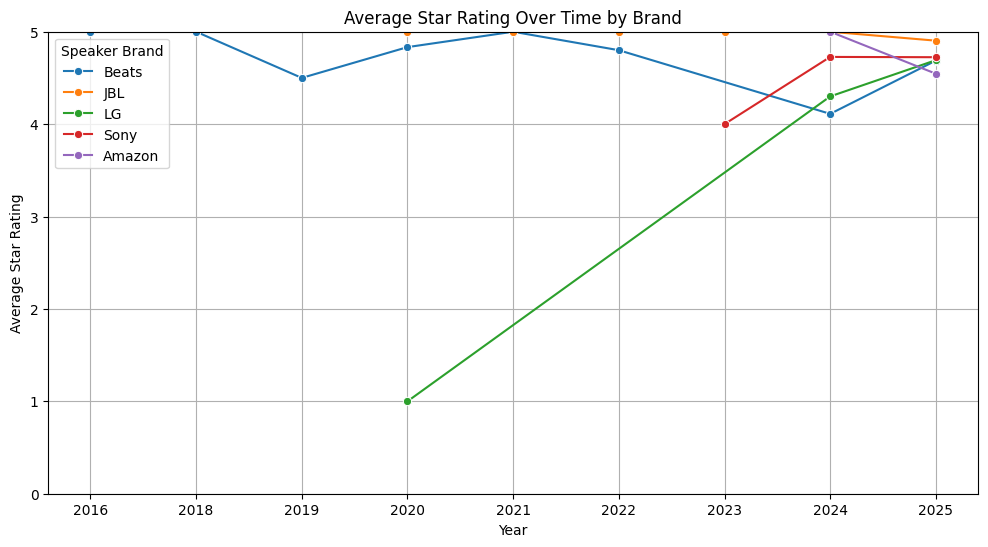

In [13]:
# calculate yearly average star rating for each product
yearly_avg = df_comp.groupby(['year', 'product'])['rating'].mean().reset_index()

# plot the timeline
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg, x='year', y='rating', hue='product', marker='o', palette='tab10')
plt.title("Average Star Rating Over Time by Brand")
plt.xlabel("Year")
plt.ylabel("Average Star Rating")
plt.xticks(yearly_avg['year'].dropna().unique())
plt.ylim(0, 5)
plt.legend(title="Speaker Brand", loc="upper left")
plt.grid(True)
plt.show()